In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, max, min, stddev
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession.builder.appName("BigDataWeatherAnalysis").getOrCreate()

In [ ]:
weather_df = spark.read.csv("/content/1. Weather Data.csv", header=True, inferSchema=True)

In [ ]:
weather_df.printSchema()

root
 |-- Date/Time: string (nullable = true)
 |-- Temp_C: double (nullable = true)
 |-- Dew Point Temp_C: double (nullable = true)
 |-- Rel Hum_%: integer (nullable = true)
 |-- Wind Speed_km/h: integer (nullable = true)
 |-- Visibility_km: double (nullable = true)
 |-- Press_kPa: double (nullable = true)
 |-- Weather: string (nullable = true)



In [ ]:
total_rows = weather_df.count()
print(f"Total rows: {total_rows}")

Total rows: 8784


In [ ]:
null_counts = weather_df.select([count(col(c).isNull()).alias(c) for c in weather_df.columns])
null_counts.show()

+---------+------+----------------+---------+---------------+-------------+---------+-------+
|Date/Time|Temp_C|Dew Point Temp_C|Rel Hum_%|Wind Speed_km/h|Visibility_km|Press_kPa|Weather|
+---------+------+----------------+---------+---------------+-------------+---------+-------+
|     8784|  8784|            8784|     8784|           8784|         8784|     8784|   8784|
+---------+------+----------------+---------+---------------+-------------+---------+-------+



In [ ]:
avg_temp = weather_df.agg(avg(col("Temp_C")).alias("Average_Temperature"))
avg_temp.show()

+-------------------+
|Average_Temperature|
+-------------------+
|   8.79814435336981|
+-------------------+



In [ ]:
max_min_temp = weather_df.agg(max(col("Temp_C")).alias("Max_Temperature"),
                              min(col("Temp_C")).alias("Min_Temperature"))
max_min_temp.show()

+---------------+---------------+
|Max_Temperature|Min_Temperature|
+---------------+---------------+
|           33.0|          -23.3|
+---------------+---------------+



In [ ]:
weather_counts = weather_df.groupBy("Weather").agg(count("Weather").alias("Count")).orderBy(col("Count").desc())
weather_counts.show(10)

+-------------+-----+
|      Weather|Count|
+-------------+-----+
| Mainly Clear| 2106|
|Mostly Cloudy| 2069|
|       Cloudy| 1728|
|        Clear| 1326|
|         Snow|  390|
|         Rain|  306|
| Rain Showers|  188|
|          Fog|  150|
|     Rain,Fog|  116|
|  Drizzle,Fog|   80|
+-------------+-----+
only showing top 10 rows



In [ ]:
stddev_wind_speed = weather_df.agg(stddev(col("Wind Speed_km/h")).alias("StdDev_Wind_Speed"))
stddev_wind_speed.show()

+-----------------+
|StdDev_Wind_Speed|
+-----------------+
|8.688696079468853|
+-----------------+



In [ ]:
extreme_temps = weather_df.filter((col("Temp_C") > 30) | (col("Temp_C") < -20))
extreme_temps.show(5)

+---------------+------+----------------+---------+---------------+-------------+---------+-------------+
|      Date/Time|Temp_C|Dew Point Temp_C|Rel Hum_%|Wind Speed_km/h|Visibility_km|Press_kPa|      Weather|
+---------------+------+----------------+---------+---------------+-------------+---------+-------------+
|1/14/2012 23:00| -20.3|           -26.2|       59|              9|         25.0|   101.79|Mostly Cloudy|
| 1/15/2012 0:00| -21.2|           -26.8|       61|             11|         25.0|   101.81|       Cloudy|
| 1/15/2012 1:00| -21.1|           -26.6|       61|              9|         25.0|   101.86|       Cloudy|
| 1/15/2012 2:00| -21.4|           -26.6|       63|              9|         25.0|   101.99|       Cloudy|
| 1/15/2012 3:00| -20.7|           -26.1|       62|              4|         25.0|   102.04|       Cloudy|
+---------------+------+----------------+---------+---------------+-------------+---------+-------------+
only showing top 5 rows



In [ ]:
unique_weather = weather_df.select("Weather").distinct().count()
print(f"Number of unique weather conditions: {unique_weather}")

Number of unique weather conditions: 50


In [ ]:
avg_visibility = weather_df.agg(avg(col("Visibility_km")).alias("Average_Visibility"))
avg_visibility.show()

+------------------+
|Average_Visibility|
+------------------+
| 27.66444672131151|
+------------------+



In [ ]:
most_frequent_weather = weather_df.groupBy("Weather").count().orderBy(col("count").desc()).limit(1)
most_frequent_weather.show()

+------------+-----+
|     Weather|count|
+------------+-----+
|Mainly Clear| 2106|
+------------+-----+



In [ ]:
avg_humidity = weather_df.agg(avg(col("Rel Hum_%")).alias("Average_Humidity"))
avg_humidity.show()

+-----------------+
| Average_Humidity|
+-----------------+
|67.43169398907104|
+-----------------+



In [ ]:
correlation_temp_dew = weather_df.stat.corr("Temp_C", "Dew Point Temp_C")
print(f"Correlation between Temperature and Dew Point: {correlation_temp_dew}")

Correlation between Temperature and Dew Point: 0.9327141498173755


In [ ]:
low_visibility = weather_df.filter(col("Visibility_km") < 5)
low_visibility.show(5)

+--------------+------+----------------+---------+---------------+-------------+---------+--------------------+
|     Date/Time|Temp_C|Dew Point Temp_C|Rel Hum_%|Wind Speed_km/h|Visibility_km|Press_kPa|             Weather|
+--------------+------+----------------+---------+---------------+-------------+---------+--------------------+
| 1/1/2012 2:00|  -1.8|            -3.4|       89|              7|          4.0|   101.26|Freezing Drizzle,Fog|
| 1/1/2012 3:00|  -1.5|            -3.2|       88|              6|          4.0|   101.27|Freezing Drizzle,Fog|
| 1/1/2012 4:00|  -1.5|            -3.3|       88|              7|          4.8|   101.23|                 Fog|
| 1/1/2012 9:00|  -1.3|            -3.1|       88|             15|          4.0|    101.2|                 Fog|
|1/1/2012 10:00|  -1.0|            -2.3|       91|              9|          1.2|   101.15|                 Fog|
+--------------+------+----------------+---------+---------------+-------------+---------+--------------

In [ ]:
avg_wind_speed_weather = weather_df.groupBy("Weather").agg(avg(col("Wind Speed_km/h")).alias("Avg_Wind_Speed"))
avg_wind_speed_weather.show(5)

+--------------------+------------------+
|             Weather|    Avg_Wind_Speed|
+--------------------+------------------+
|        Mainly Clear|14.144824311490979|
|              Cloudy|16.127314814814813|
|  Thunderstorms,Rain|15.666666666666666|
|           Rain,Snow| 28.38888888888889|
|Freezing Rain,Sno...|              32.0|
+--------------------+------------------+
only showing top 5 rows



In [ ]:
max_pressure = weather_df.agg(max(col("Press_kPa")).alias("Max_Pressure"))
max_pressure.show()

+------------+
|Max_Pressure|
+------------+
|      103.65|
+------------+



In [ ]:
avg_temp_by_weather = weather_df.groupBy("Weather").agg(avg(col("Temp_C")).alias("Avg_Temp"))
avg_temp_by_weather.show(5)

+--------------------+------------------+
|             Weather|          Avg_Temp|
+--------------------+------------------+
|        Mainly Clear|12.558926875593524|
|              Cloudy| 7.970543981481501|
|  Thunderstorms,Rain|20.433333333333334|
|           Rain,Snow|1.0555555555555556|
|Freezing Rain,Sno...|              -5.0|
+--------------------+------------------+
only showing top 5 rows



In [ ]:
high_wind_days = weather_df.filter(col("Wind Speed_km/h") > 50)
high_wind_days.show(5)

+---------------+------+----------------+---------+---------------+-------------+---------+-------------+
|      Date/Time|Temp_C|Dew Point Temp_C|Rel Hum_%|Wind Speed_km/h|Visibility_km|Press_kPa|      Weather|
+---------------+------+----------------+---------+---------------+-------------+---------+-------------+
| 1/18/2012 1:00|   3.7|            -2.1|       66|             83|         25.0|    98.36|Mostly Cloudy|
| 1/18/2012 2:00|   0.5|            -4.0|       72|             70|         25.0|    98.62|Mostly Cloudy|
| 1/18/2012 3:00|  -3.5|            -8.2|       70|             57|         25.0|     99.0|Mostly Cloudy|
|1/28/2012 23:00|   1.2|            -1.7|       81|             52|         16.1|    99.87|    Rain,Snow|
| 1/29/2012 0:00|   1.5|            -5.0|       62|             57|         25.0|    99.96| Mainly Clear|
+---------------+------+----------------+---------+---------------+-------------+---------+-------------+
only showing top 5 rows



In [ ]:
perfect_visibility_days = weather_df.filter(col("Visibility_km") == 25)
perfect_visibility_days.show(5)

+--------------+------+----------------+---------+---------------+-------------+---------+------------+
|     Date/Time|Temp_C|Dew Point Temp_C|Rel Hum_%|Wind Speed_km/h|Visibility_km|Press_kPa|     Weather|
+--------------+------+----------------+---------+---------------+-------------+---------+------------+
|1/1/2012 20:00|   3.2|             1.3|       87|             19|         25.0|     99.5|      Cloudy|
|1/1/2012 21:00|   4.0|             1.7|       85|             20|         25.0|    99.39|      Cloudy|
|1/1/2012 23:00|   5.3|             2.0|       79|             30|         25.0|    99.31|      Cloudy|
| 1/2/2012 0:00|   5.2|             1.5|       77|             35|         25.0|    99.26|Rain Showers|
| 1/2/2012 1:00|   4.6|             0.0|       72|             39|         25.0|    99.26|      Cloudy|
+--------------+------+----------------+---------+---------------+-------------+---------+------------+
only showing top 5 rows

+--------------+------+----------------

In [ ]:
median_temp = weather_df.approxQuantile("Temp_C", [0.5], 0.01)
print(f"Median Temperature: {median_temp[0]}")

Median Temperature: 9.2


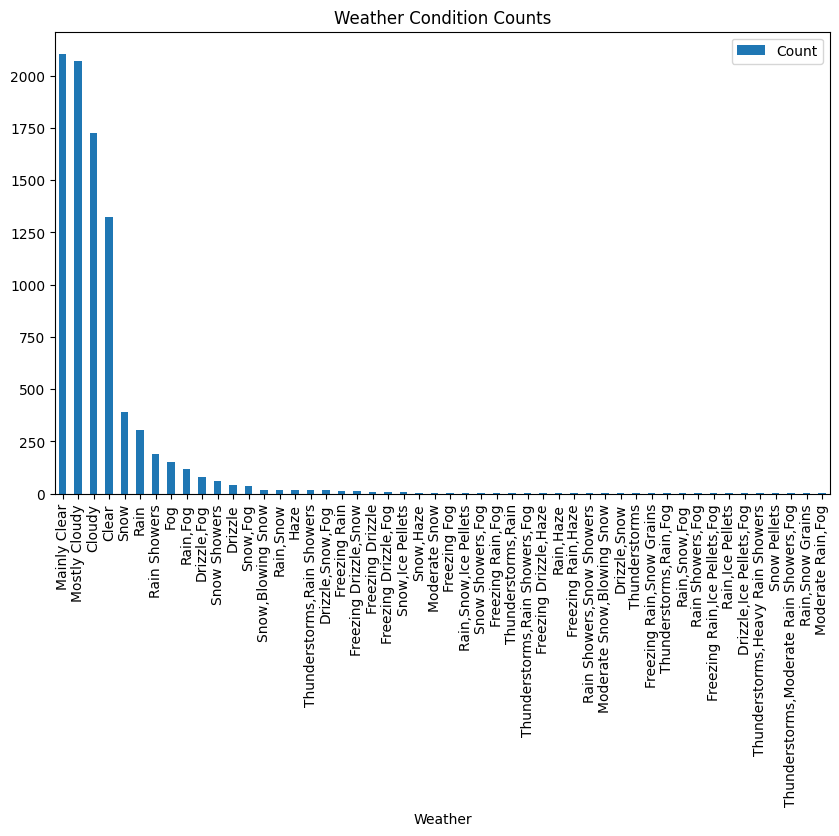

In [ ]:
weather_counts_pd = weather_counts.toPandas()
weather_counts_pd.plot(kind='bar', x='Weather', y='Count', title='Weather Condition Counts', figsize=(10, 6))
plt.show()

In [ ]:
spark.stop()